## Importing Packages for building classification models using Machine Learning

In [1]:
#Packages related to general operating system & warnings
import os
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding,feature selection
import numpy as np
import pandas as pd
import dtale 
import scipy.stats as stats
import sklearn

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_regression 

#Packages related to data visualizaiton
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Modules related key techniques of supervised learning 
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.tree import  DecisionTreeRegressor#, export_graphviz, export
from sklearn.ensemble import  AdaBoostRegressor,RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor,VotingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix

<Figure size 432x216 with 0 Axes>

In [2]:
# Import datasets
os.chdir(r'C:\Users\itsfe\Downloads\ML CASE STUDY 1')

In [3]:
cred_cons=pd.read_excel('CreditConsumptionData.xlsx')
cust_beh=pd.read_excel('CustomerBehaviorData.xlsx')
cust_demo=pd.read_excel('CustomerDemographics.xlsx')

In [4]:
# Info of datasets
cred_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       20000 non-null  int64  
 1   cc_cons  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 312.6 KB


In [5]:
cust_beh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            19999 non-null  float64
 4   dc_cons_may            20000 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            19999 non-null  float64
 7   cc_count_apr           19999 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

In [6]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB


In [7]:
join=pd.merge(how='left',left=cred_cons,right=cust_beh,on='ID')
joined=pd.merge(how='left',left=join,right=cust_demo,on='ID')

In [8]:
joined

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,12554,20014.0,24893.000,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,...,1674.09,current,M,35,MEDIUM,15.0,1,708.0,0,17.0
1,17645,10173.0,18941.620,966.00,20672.00,287.00,4217.00,885.00,1.0,7,...,13043.34,current,M,35,HIGH,15.0,6,123.0,0,14.0
2,7604,16095.0,5678.870,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,...,25375.27,current,M,55,MEDIUM,24.5,1,802.0,1,3.0
3,1590,7707.0,30489.500,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,...,3544.33,current,F,29,MEDIUM,4.5,6,867.0,1,4.0
4,16556,96408.0,7441.400,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,...,12780.44,current,M,34,MEDIUM,12.6,4,802.0,1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,NaN,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,...,7870.88,current,M,35,MEDIUM,13.5,1,523.0,0,7.0
19996,14224,NaN,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,...,3668.30,current,M,53,MEDIUM,9.9,7,723.0,1,2.0
19997,18740,NaN,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,...,5450.34,current,M,62,HIGH,37.8,8,863.0,1,16.0
19998,18134,NaN,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,...,59.29,current,M,34,MEDIUM,12.6,4,882.0,0,13.0


In [9]:
#Splitting dataset into existing and new
existing=joined[~joined.cc_cons.isna()]
new=joined[joined.cc_cons.isna()]

In [10]:
#Existing Customers
existing.head()

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
15000,17591,NaN,2795.45,1290.0,6141.05,676.50,9146.10,15479.00,4.0,10,...,1170.49,current,M,37,MEDIUM,11.9,4,575.0,1,16.0
15001,13541,NaN,29405.13,1640.0,1670.00,2463.92,10947.50,956.00,3.0,10,...,16447.45,current,M,33,MEDIUM,7.8,6,394.0,0,19.0
15002,13431,NaN,5985.20,6189.0,2696.09,766.00,716.00,4133.22,7.0,30,...,2622.28,current,M,53,LOW,33.0,10,324.0,1,15.0
15003,8687,NaN,2105.93,18225.0,34763.56,167.00,4260.27,20185.00,1.0,99,...,340.79,current,M,33,MEDIUM,7.8,5,370.0,1,7.0
15004,14727,NaN,3269.00,3532.0,3158.40,2699.77,3373.48,5120.00,2.0,10,...,2812.20,current,M,62,LOW,12.6,9,505.0,1,3.0


In [118]:
#New customers
new.head()

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
15000,17591,NaN,2795.45,1290.0,6141.05,676.50,9146.10,15479.00,4.0,10,...,1170.49,current,M,37,MEDIUM,11.9,4,575.0,1,16.0
15001,13541,NaN,29405.13,1640.0,1670.00,2463.92,10947.50,956.00,3.0,10,...,16447.45,current,M,33,MEDIUM,7.8,6,394.0,0,19.0
15002,13431,NaN,5985.20,6189.0,2696.09,766.00,716.00,4133.22,7.0,30,...,2622.28,current,M,53,LOW,33.0,10,324.0,1,15.0
15003,8687,NaN,2105.93,18225.0,34763.56,167.00,4260.27,20185.00,1.0,99,...,340.79,current,M,33,MEDIUM,7.8,5,370.0,1,7.0
15004,14727,NaN,3269.00,3532.0,3158.40,2699.77,3373.48,5120.00,2.0,10,...,2812.20,current,M,62,LOW,12.6,9,505.0,1,3.0


In [11]:
new_X=new[new.columns.difference(['cc_cons'])]
new_X

,Avg_days_between_transaction,Emp_Tenure_Years,ID,Income,NetBanking_Flag,Tenure_with_Bank,account_type,age,card_lim,cc_cons_apr,...,investment_4,loan_enq,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,personal_loan_active,personal_loan_closed,region_code,vehicle_loan_active,vehicle_loan_closed
15000,16.0,11.9,17591,MEDIUM,1,4,current,37,125000,2795.450,...,-5715.49023,Y,24485.0,25945.92,9750.0,1,1.0,575.0,1,1
15001,19.0,7.8,13541,MEDIUM,0,6,current,33,59000,29405.130,...,35346.00000,Y,3375.0,12214.00,16967.0,1,1.0,394.0,1,1
15002,15.0,33.0,13431,LOW,1,10,current,53,49999,5985.200,...,2557.00000,Y,14950.0,13215.00,36398.0,1,1.0,324.0,1,1
15003,7.0,7.8,8687,MEDIUM,1,5,current,33,520000,2105.930,...,5464.00000,Y,235844.0,72317.00,97825.0,1,1.0,370.0,1,1
15004,3.0,12.6,14727,LOW,1,9,current,62,152000,3269.000,...,1332.00000,Y,14495.0,42344.00,27936.0,1,1.0,505.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7.0,13.5,12512,MEDIUM,0,1,current,35,595000,4641.500,...,553.00000,Y,27825.0,58037.00,32944.0,1,1.0,523.0,1,1
19996,2.0,9.9,14224,MEDIUM,1,7,current,53,13000,4994.450,...,20324.00000,Y,27912.0,24110.00,8850.0,1,1.0,723.0,1,1
19997,16.0,37.8,18740,HIGH,1,8,current,62,124000,3262.145,...,6885.00000,Y,14580.0,1769.00,35819.0,1,1.0,863.0,1,1
19998,13.0,12.6,18134,MEDIUM,0,4,current,34,371000,12824.010,...,10455.00000,Y,23881.0,37255.00,39083.0,1,1.0,882.0,1,1


In [12]:
#Summarising data
#dt=dtale.show(existing)
#dt.open_browser()


# EDA

In [13]:
col=existing.columns

In [14]:
# Separating numerical columns
Numcol=[ 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may',
       'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr',
       'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'dc_count_jun', 'card_lim','investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'Emp_Tenure_Years', 'Tenure_with_Bank',
       'NetBanking_Flag', 'Avg_days_between_transaction']

In [15]:
#Separating Binary columns
Bincol=existing.columns.difference(Numcol).difference(['ID'])
Bincol

Index(['Income', 'account_type', 'age', 'cc_cons', 'emi_active', 'gender',
       'loan_enq', 'personal_loan_active', 'personal_loan_closed',
       'region_code', 'vehicle_loan_active', 'vehicle_loan_closed'],
      dtype='object')

In [16]:
ex_num=existing[Numcol]
ex_num

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,Emp_Tenure_Years,Tenure_with_Bank,NetBanking_Flag,Avg_days_between_transaction
0,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,10,48,...,24563.0,30051.32,12761.00,2,65,50836.00,15.0,1,0,17.0
1,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,13,3,...,23948.0,42119.05,76206.00,21,63,23226.00,15.0,6,0,14.0
2,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,102,4,...,10752.0,58373.25,75283.00,7,1,27036.00,24.5,1,1,3.0
3,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,50,1,...,12607.0,69851.51,68708.00,21,83,43037.00,4.5,6,1,4.0
4,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,82,54,...,25213.0,10071.00,80140.00,8,32,32044.00,12.6,4,1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,3,44,...,6936.0,487751.19,42625.50,14,8,82851.00,13.2,9,1,20.0
14996,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,4,7,...,202639.0,8666.01,34987.55,11,18,118110.47,2.4,9,1,2.0
14997,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,61,24,...,44421.0,97896.48,261432.00,4,73,49545.00,3.4,9,1,8.0
14998,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,44,3,...,22409.0,22693.92,33025.29,3,80,16130.00,40.0,10,1,3.0


findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


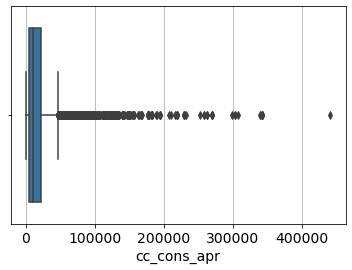

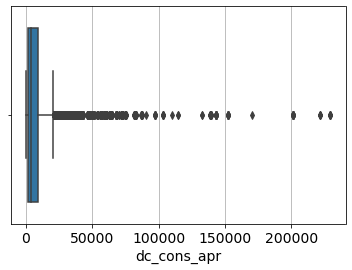

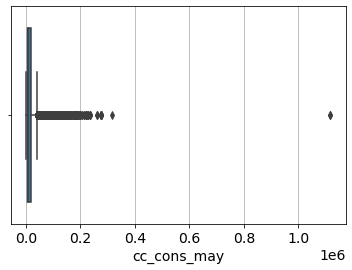

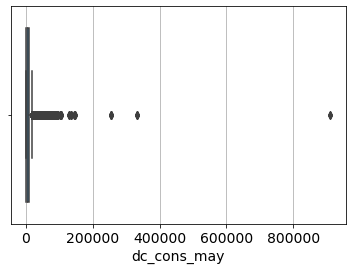

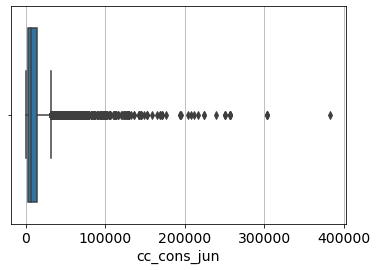

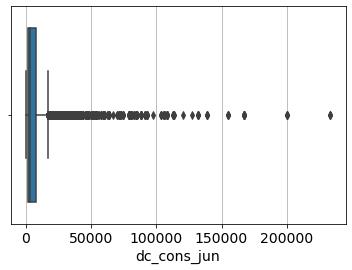

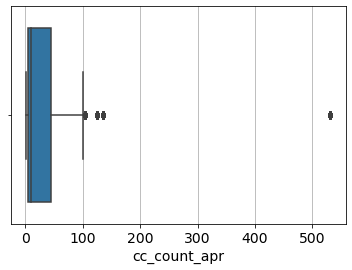

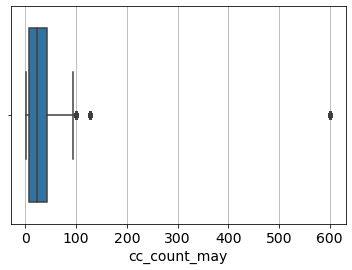

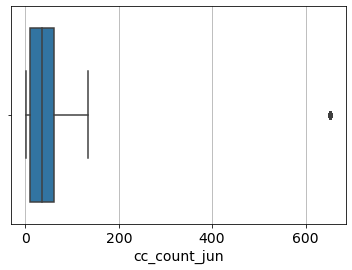

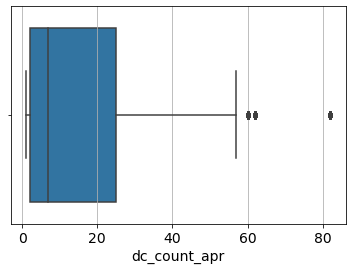

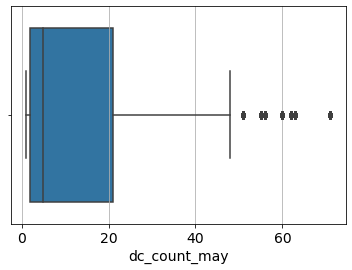

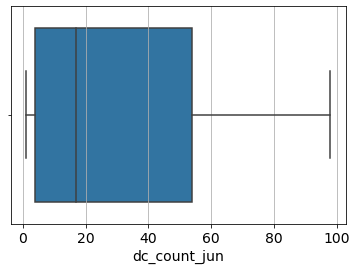

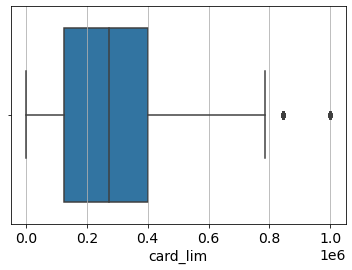

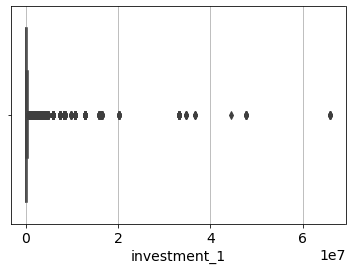

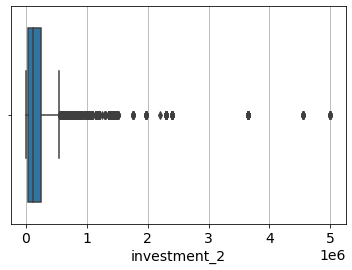

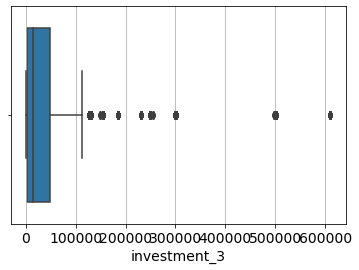

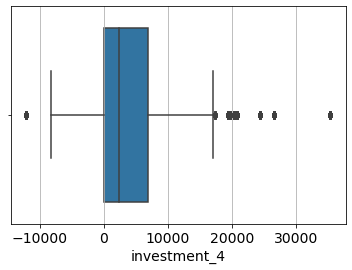

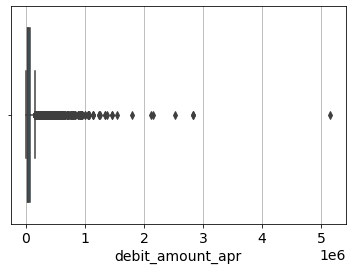

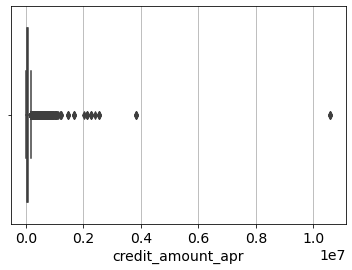

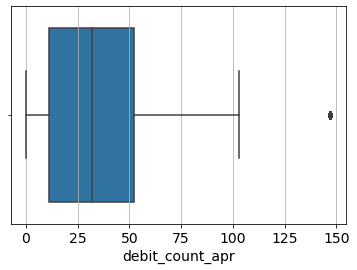

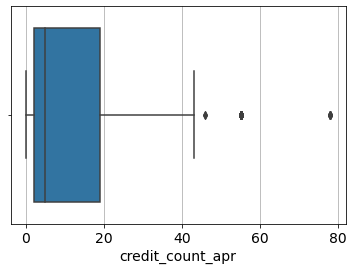

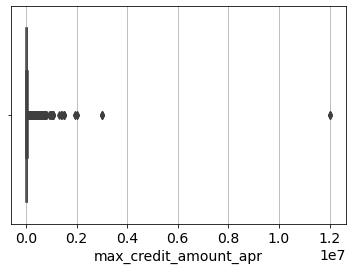

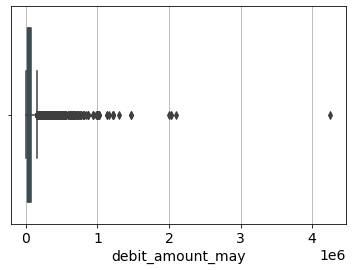

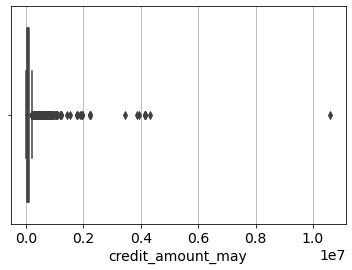

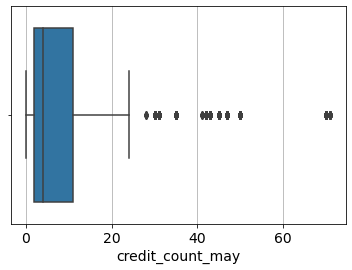

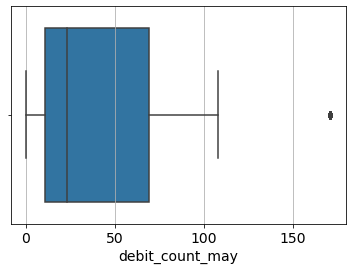

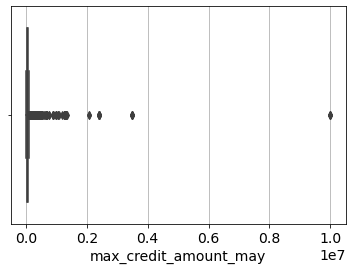

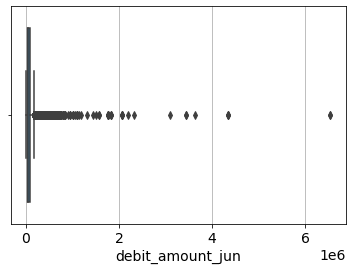

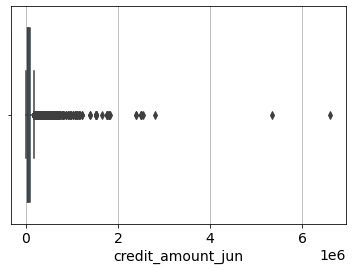

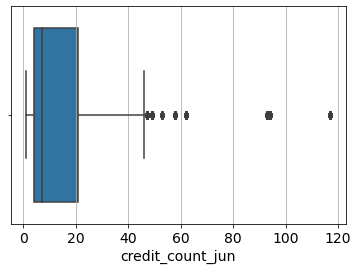

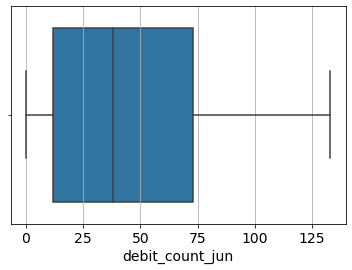

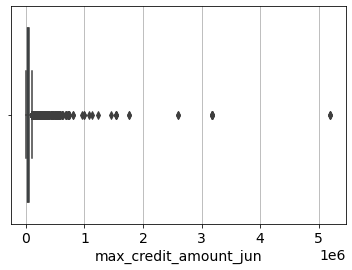

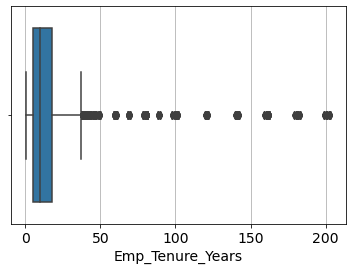

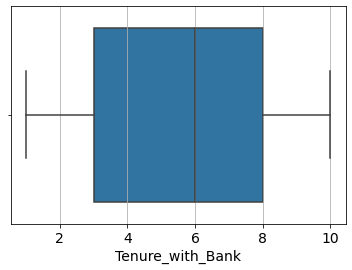

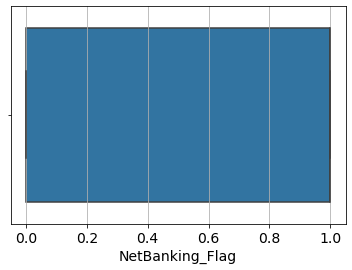

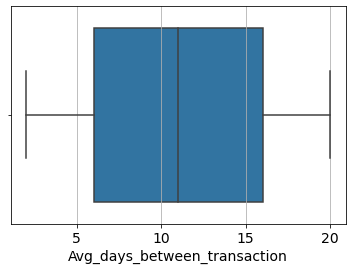

In [17]:
#Checking for outliers:
for i in Numcol:
    sns.boxplot(existing[i])
    plt.show()

In [18]:
#Outlier treatment
def outlier_cap(x):
    if (x.dtypes==float)or x.dtypes==int :
        x=x.clip(lower=x.quantile(0.01),upper=x.quantile(0.70))
    else:
        x
    return x
existing=existing.apply(outlier_cap)

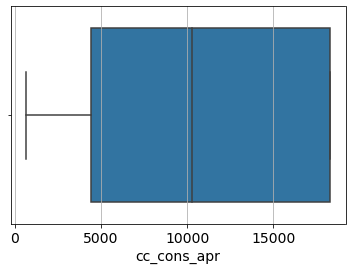

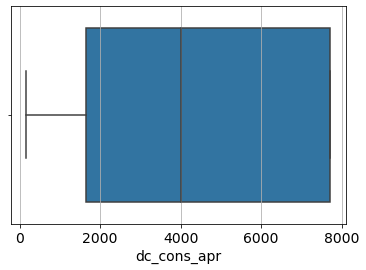

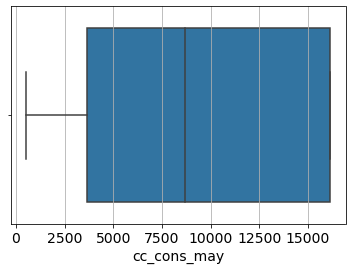

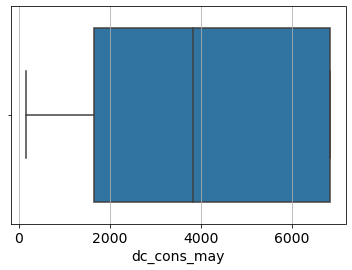

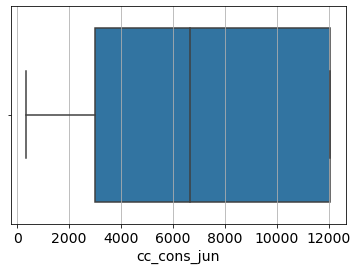

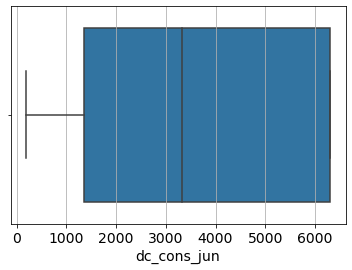

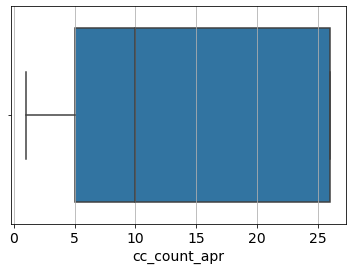

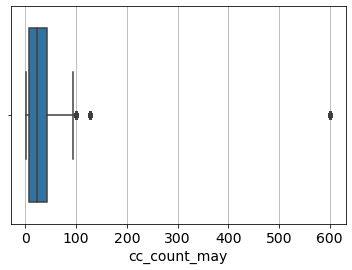

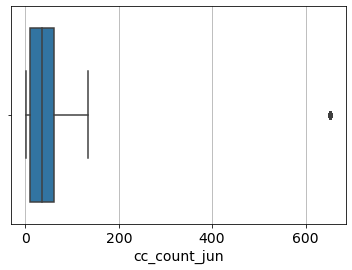

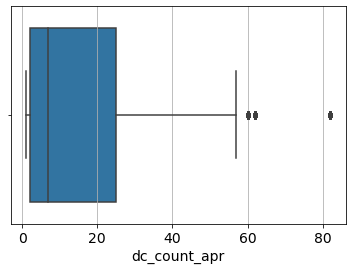

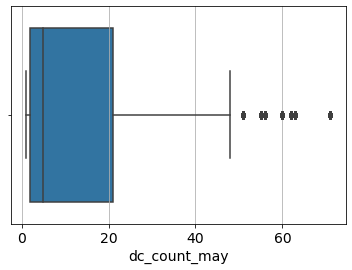

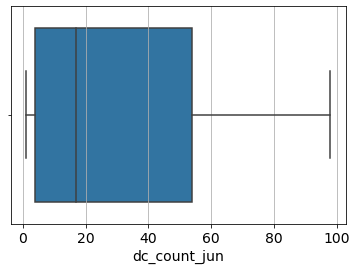

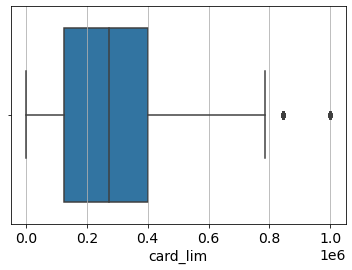

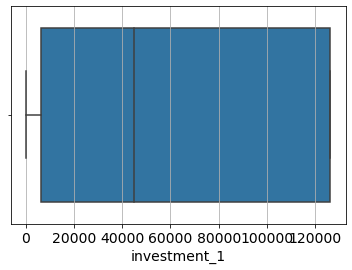

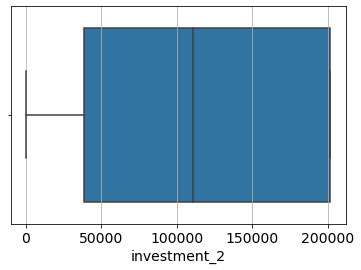

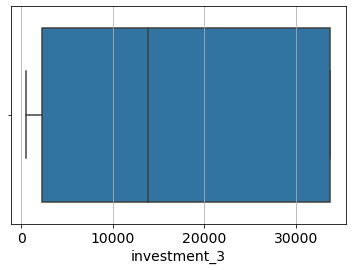

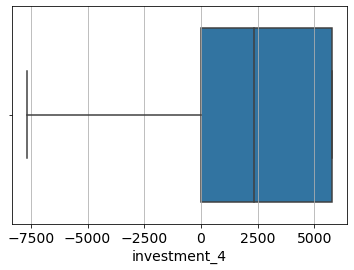

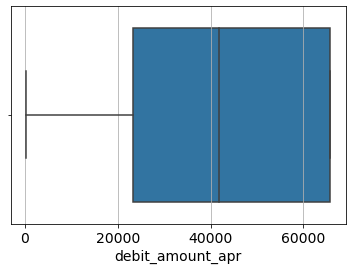

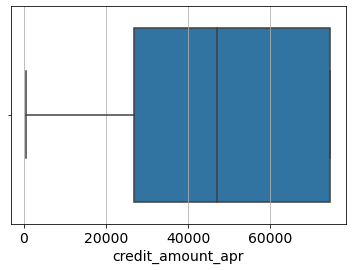

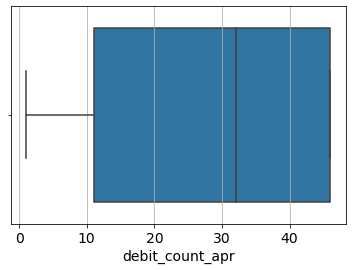

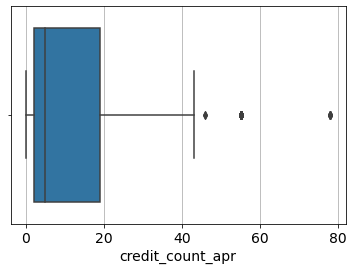

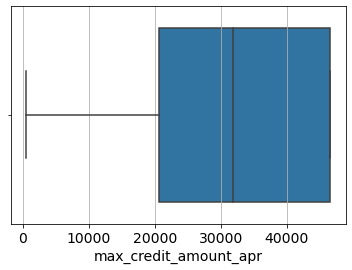

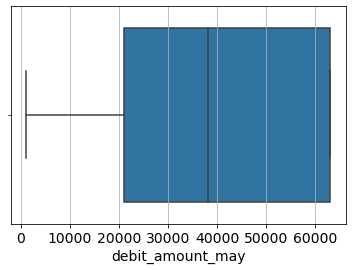

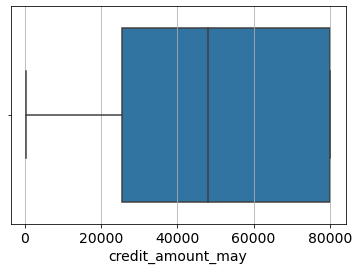

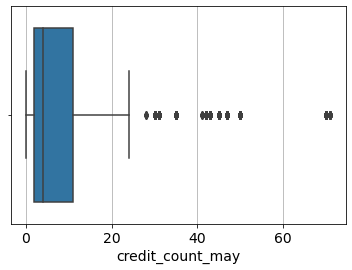

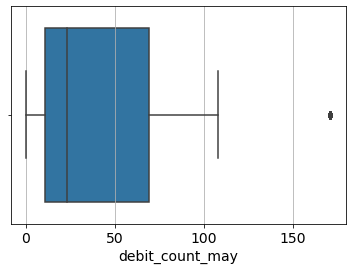

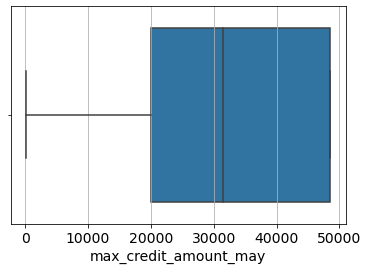

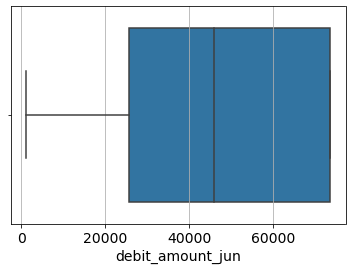

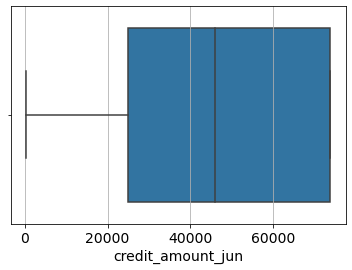

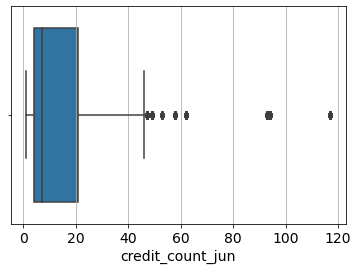

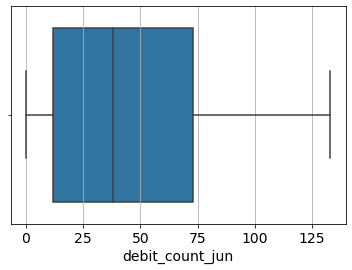

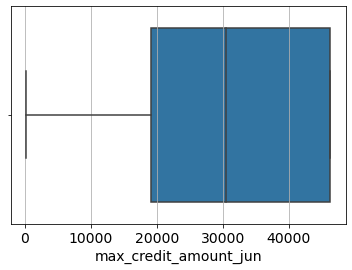

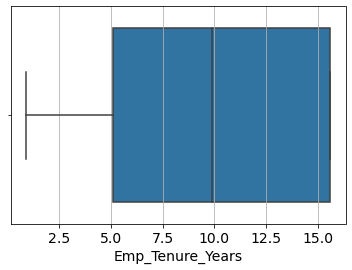

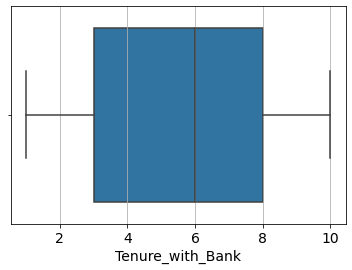

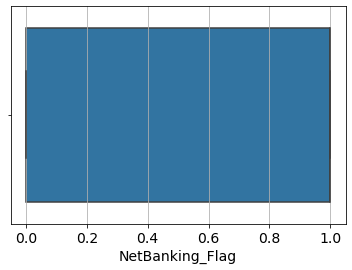

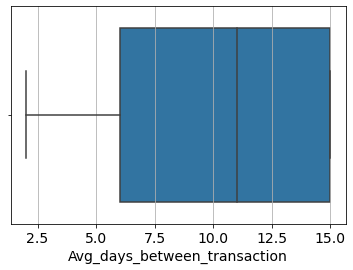

In [19]:
#Verifying outliers
for i in Numcol:
    sns.boxplot(existing[i])
    plt.show() 

In [20]:
#Missing value treatment
def missing_treat(x):
    if (x.dtype=='float') or (x.dtype=='int'):
        x = x.fillna(x.median())
    elif x.dtype=='object':
        x = x.fillna(x.mode()[0])
    else:
        x
    return(x)

existing=existing.apply(missing_treat)

In [21]:
#Dummy creation
existing=pd.get_dummies(existing,columns=['account_type','gender','loan_enq'],drop_first=True)

In [22]:
#Label encoding
encoder=LabelEncoder()
existing['Income']=encoder.fit_transform(existing['Income'])

In [23]:
#Splitting dataset into X and y
y=existing['cc_cons']
X=existing[existing.columns.difference(['cc_cons'])]

In [24]:
y

0        18702.3
1        10173.0
2        16095.0
3         7707.0
4        18702.3
          ...   
14995     4263.0
14996    11019.0
14997    18702.3
14998    18702.3
14999    16252.0
Name: cc_cons, Length: 15000, dtype: float64

In [25]:
#Verifying missings
X.isnull().sum().sum()

0

In [26]:
#Checking for low variance
def cv(x):
    return (x.std()/x.mean())
X.apply(cv).sort_values()

vehicle_loan_closed             0.000000
personal_loan_closed            0.000000
personal_loan_active            0.000000
vehicle_loan_active             0.000000
region_code                     0.315456
gender_M                        0.398446
Income                          0.408406
max_credit_amount_apr           0.418671
Avg_days_between_transaction    0.438414
max_credit_amount_may           0.464877
max_credit_amount_jun           0.474705
credit_amount_apr               0.508253
debit_amount_jun                0.515690
Emp_Tenure_Years                0.518792
Tenure_with_Bank                0.520106
debit_amount_apr                0.521376
debit_amount_may                0.528957
credit_amount_jun               0.532893
credit_amount_may               0.545400
ID                              0.574195
cc_cons_jun                     0.603997
cc_cons_apr                     0.609443
dc_cons_may                     0.613791
debit_count_apr                 0.614291
NetBanking_Flag 

In [27]:
#Dropping columns with less variance

existing.drop(columns=['personal_loan_active',            
                    'vehicle_loan_active',            
                    'personal_loan_closed',           
                    'vehicle_loan_closed'],inplace=True)


<AxesSubplot:>

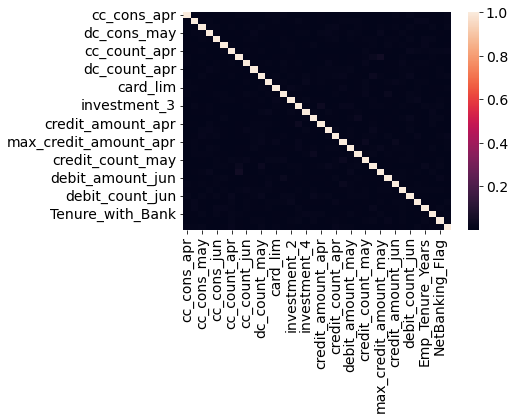

In [28]:
# visualize correlation matrix in Seaborn using a heatmap for Numerical columns
sns.heatmap(ex_num.corr().abs())

In [29]:
# X vs Y - Numerical correlation
existing.corrwith(existing['cc_cons']).abs().sort_values(ascending=False)

cc_cons                         1.000000
investment_3                    0.026699
cc_count_may                    0.025298
debit_count_apr                 0.016599
debit_count_jun                 0.013942
emi_active                      0.013940
age                             0.012682
Income                          0.012618
credit_amount_apr               0.011740
dc_cons_apr                     0.010957
cc_count_apr                    0.010551
Avg_days_between_transaction    0.008097
debit_count_may                 0.007663
cc_count_jun                    0.007329
cc_cons_apr                     0.006855
card_lim                        0.006493
max_credit_amount_may           0.006035
dc_count_apr                    0.005682
credit_count_apr                0.005568
credit_amount_jun               0.005229
credit_count_may                0.005077
Emp_Tenure_Years                0.004894
max_credit_amount_jun           0.004779
investment_2                    0.004268
region_code     

findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


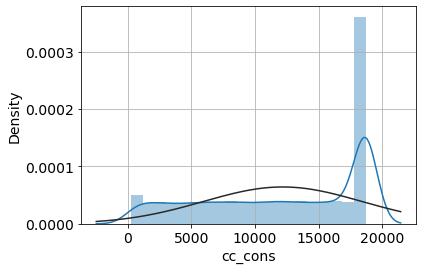

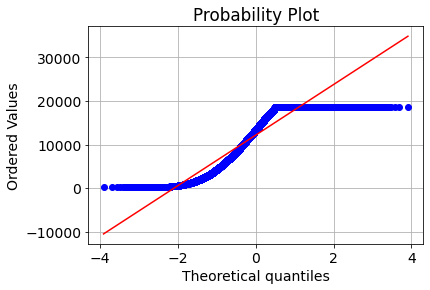

In [30]:
#histogram and normal probability plot for label variable

y_df=existing[['cc_cons']]
from scipy.stats import norm
sns.distplot(y_df['cc_cons'],fit=norm);
fig = plt.figure()
res = stats.probplot(y_df['cc_cons'], plot=plt)


In [31]:
#Transforming y variable
trans_y=np.log(y)

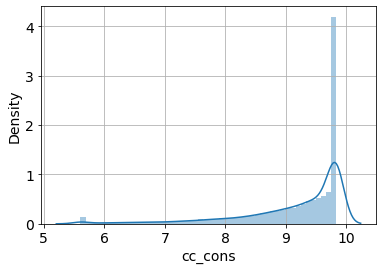

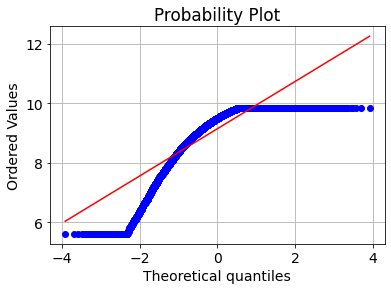

In [32]:
#histogram and normal probability plot for transformed label variable
from scipy.stats import norm
sns.distplot(trans_y);
fig = plt.figure()
res = stats.probplot(trans_y, plot=plt)


In [33]:
## Transforming X variables 
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=True)
pg=pt.fit_transform(X)

In [34]:
X_trs = pd.DataFrame(pg,index=X.index,columns=X.columns)

In [35]:
#Splitting of transformed variables into train and test
train_Xt,test_Xt,train_yt,test_yt=train_test_split(X_trs,trans_y,test_size=0.3,random_state=1)

In [36]:
train_Xt.shape

(10500, 47)

In [37]:
test_Xt.shape

(4500, 47)

In [38]:
train_yt

4834     8.879472
12171    9.064736
3502     8.692490
11546    9.836402
6950     8.951570
           ...   
905      9.654064
5192     9.530393
12172    9.329101
235      8.829812
13349    9.275285
Name: cc_cons, Length: 10500, dtype: float64

In [39]:
test_yt

7576     9.354268
10509    9.836402
4253     9.121837
5150     9.836402
506      9.836402
           ...   
5682     9.553504
11109    9.678217
7443     9.836402
10077    9.836402
13653    9.730443
Name: cc_cons, Length: 4500, dtype: float64

# Feature Selection

In [40]:
#### RFE
regressor = LinearRegression()
rfe = RFECV(estimator=regressor,min_features_to_select=8,step=1,scoring="neg_mean_squared_error",cv=5,verbose=True,n_jobs=-1)
rfe = rfe.fit(train_Xt, train_yt)

Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 fe

In [41]:
#rfecv1=RFECV(estimator=estimate,step=1,min_features_to_select=8,scoring="neg_mean_squared_error",cv=5,verbose=True,n_jobs=-1)

In [42]:
imp_vars_RFE = list(train_Xt.columns[rfe.support_])

In [43]:
imp_vars_RFE 

['cc_count_apr',
 'cc_count_may',
 'credit_count_apr',
 'credit_count_may',
 'dc_count_may',
 'debit_count_jun',
 'investment_3',
 'max_credit_amount_may']

In [44]:
SKB=SelectKBest(f_regression,k=8).fit(X_trs,trans_y)

In [45]:
SKB.get_support()
imp_vars_SKB = list(train_Xt.columns[SKB.get_support()])

In [46]:
imp_vars_SKB

['Avg_days_between_transaction',
 'Income',
 'cc_count_apr',
 'dc_cons_apr',
 'dc_count_apr',
 'debit_count_apr',
 'debit_count_jun',
 'investment_3']

In [47]:
#Final List (from RFE, SelectKbest) 
fxy = list(set(imp_vars_SKB + imp_vars_RFE))
fxy

['Income',
 'Avg_days_between_transaction',
 'cc_count_may',
 'cc_count_apr',
 'debit_count_apr',
 'dc_cons_apr',
 'investment_3',
 'max_credit_amount_may',
 'credit_count_may',
 'debit_count_jun',
 'dc_count_apr',
 'dc_count_may',
 'credit_count_apr']

In [48]:
#Final X variables

X_fin=X_trs[['debit_count_apr',
 'credit_count_may',
 'debit_count_jun',
 'dc_count_may',
 'dc_count_apr',
 'cc_count_apr',
 'cc_count_may',
 'investment_3',
 'credit_count_apr',
 'Income',
 'Avg_days_between_transaction',
 'dc_cons_apr',
 'max_credit_amount_may']]

In [49]:
## Calculation of VIF
vif=pd.DataFrame()
vif['VIF_factor']=[variance_inflation_factor(X_fin.values,i) for i in range(X_fin.shape[1])]
vif['Features']=X_fin.columns
vif

,VIF_factor,Features
0,1.000513,debit_count_apr
1,1.000668,credit_count_may
2,1.000685,debit_count_jun
3,1.001375,dc_count_may
4,1.000827,dc_count_apr
5,1.000780,cc_count_apr
6,1.000517,cc_count_may
7,1.000468,investment_3
8,1.001170,credit_count_apr
9,1.000414,Income


Since the VIF value is less than 5 for all variables, the columns are not having multicollinearity.

In [50]:
#Splitting into train and test
train_Xf,test_Xf,train_yt,test_yt=train_test_split(X_fin,trans_y,test_size=0.3,random_state=123)

## Linear Regression

In [51]:
lin_reg=LinearRegression(n_jobs=-1)
lin_model=lin_reg.fit(train_Xf,train_yt)
lin_model

LinearRegression(n_jobs=-1)

In [52]:
train_lin = lin_reg.predict(train_Xf)
test_lin = lin_reg.predict(test_Xf)


In [53]:
metrics.mean_absolute_percentage_error(train_yt,train_lin)

0.08296962438568758

In [54]:
metrics.mean_absolute_percentage_error(test_yt, test_lin)

0.08173046327249191

In [55]:
rmspe_train = (np.sqrt(np.mean(np.square((train_yt - train_lin) / train_yt)))) 
rmspe_train

0.1285162788544509

In [56]:
rmspe_test = (np.sqrt(np.mean(np.square((test_yt - test_lin) / test_yt))))
rmspe_test

0.12880514164310095

# Random Forest Modelling

In [57]:
radm_reg = RandomForestRegressor(n_estimators=50 , max_depth = 2, max_features=4, n_jobs=-1)
rand_fit=radm_reg.fit(train_Xf, train_yt)

In [58]:
rand_model=rand_fit.fit(train_Xf,train_yt)

In [59]:
train_pred=rand_fit.predict(train_Xf)

In [60]:
test_pred=rand_fit.predict(test_Xf)

In [61]:
metrics.mean_absolute_percentage_error(train_yt,train_pred)

0.08304736342888236

In [62]:
metrics.mean_absolute_percentage_error(test_yt,test_pred)

0.08192942523002368

In [63]:
rmspe_train = (np.sqrt(np.mean(np.square((train_yt - train_pred) / train_yt)))) 
rmspe_train

0.1283518514858596

In [64]:
rmspe_test = (np.sqrt(np.mean(np.square((test_yt - test_pred) / test_yt)))) 
rmspe_test

0.12882453202541716

# XGBoost Regression

In [65]:
#Finding the best parameters using GRidSearchCV

param_grid = {'n_estimators':[100,500,600],
            'learning_rate': [0.1,0.2,0.3],
            'colsample_bytree':[0.3,0.4,0.5],
            'gamma':[1,2],
            #'max_delta_step':[0,1,2],
            'max_depth':[2,3,4,5],
            'min_child_weight':[1.5,0.5,1],
            'reg_alpha':[0.75,0.8] ,
            'reg_lambda':[0.45,0.5],
            #'subsample':[0.6,0.7]
             }

In [66]:
grid=GridSearchCV(estimator=XGBRegressor(),param_grid=param_grid,n_jobs=-1,cv=5,verbose=True)

In [67]:
#grid.fit(train_Xf,train_yt)

In [68]:
xg_reg=XGBRegressor(colsample_bytree=0.4, gamma=0,
       learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, n_estimators=10000,
       reg_alpha=0.75, reg_lambda=0.45,seed=42,
       subsample=0.6)

In [69]:
xg_model=xg_reg.fit(train_Xf,train_yt)

In [70]:
train_xg=xg_model.predict(train_Xf)
test_xg=xg_model.predict(test_Xf)

In [71]:
#Calculating the errors for train and test
np.mean(np.abs(train_xg-train_yt))
np.mean(np.abs(test_xg-test_yt))

np.sqrt(np.mean((train_xg-train_yt)**2))
np.sqrt(np.mean((test_xg-test_yt)**2))


1.0318287846129206

In [72]:
metrics.mean_absolute_percentage_error(train_yt,train_xg)
metrics.mean_absolute_percentage_error(test_yt,test_xg)

0.0921967429727999

# KNN Regression

In [73]:
#Standardisation of train and test
std=StandardScaler()
std_tr=std.fit_transform(train_Xt)
std_te=std.fit_transform(test_Xt)

In [74]:
std_train = pd.DataFrame(std_tr, columns=train_Xt.columns, index = train_Xt.index)
std_test = pd.DataFrame(std_te, columns=test_Xt.columns, index = test_Xt.index )

In [75]:
#Hyperparameter tuning
param_grid={'n_neighbors':[3,4,5,6,7,8,9,10],'weights':['uniform','distance']}

In [76]:
knn_grid=GridSearchCV(KNeighborsRegressor(),param_grid,n_jobs=-1,cv=5,verbose=True)

In [77]:
knn_grid_fit=knn_grid.fit(std_train,train_yt)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [78]:
#Checking for the best parameters
knn_grid_fit.cv_results_

{'mean_fit_time': array([0.02637334, 0.02450304, 0.0224411 , 0.02231808, 0.01994014,
        0.01966538, 0.02550335, 0.01801853, 0.02309351, 0.01886396,
        0.01750231, 0.01914663, 0.01633997, 0.0176096 , 0.02131834,
        0.01451578]),
 'std_fit_time': array([0.00785804, 0.00869887, 0.00656562, 0.00571301, 0.00664511,
        0.00600306, 0.00752228, 0.00704009, 0.00818476, 0.00620239,
        0.00336319, 0.0060632 , 0.00181309, 0.00770456, 0.00844066,
        0.00475109]),
 'mean_score_time': array([0.53381023, 0.45507035, 0.39250593, 0.40457168, 0.39846425,
        0.4160727 , 0.41912117, 0.4307868 , 0.42752695, 0.42159243,
        0.44755445, 0.44199243, 0.44140744, 0.42368531, 0.43068447,
        0.40073781]),
 'std_score_time': array([0.03062508, 0.0748754 , 0.01151496, 0.01661757, 0.0363995 ,
        0.01534813, 0.0305831 , 0.00896487, 0.00517235, 0.01002759,
        0.01089398, 0.00960545, 0.00896003, 0.04914809, 0.01918108,
        0.03241672]),
 'param_n_neighbors': mask

In [79]:
knn_grid_fit.best_score_

-0.1122646384180415

In [80]:
knn_grid_fit.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [81]:
# Modelling using best parameters
knn_model=KNeighborsRegressor(n_neighbors =10, weights='uniform').fit(std_train,train_yt)

In [82]:
#Predicting Y for train and test
knn_model_train=knn_model.predict(std_train)
knn_model_test=knn_model.predict(std_test)

In [83]:
#Calculating the error for train and test
np.mean(np.abs(knn_model_train-train_yt))
np.mean(np.abs(knn_model_test-test_yt))

0.7058504345018444

In [84]:
metrics.mean_absolute_percentage_error(train_yt,knn_model_train)
metrics.mean_absolute_percentage_error(knn_model_test,test_yt)

0.07764199807171443

# Adaboost Regression

In [85]:
pargrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [ x for x in range(-3, 3)]}

In [86]:
gscv_ada = GridSearchCV(estimator=AdaBoostRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [87]:
gscv_ada.fit(train_Xf, train_yt)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [-3, -2, -1, 0, 1, 2],
                         'n_estimators': [100, 200, 400, 600, 800]},
             verbose=True)

In [88]:
gscv_ada.best_params_

{'learning_rate': 2, 'n_estimators': 400}

In [89]:
ada_model=AdaBoostRegressor(learning_rate=2, n_estimators= 100).fit(train_Xf,train_yt)

In [90]:
train_ada=ada_model.predict(train_Xf)
test_ada=ada_model.predict(test_Xf)

In [91]:
#Calculating the errors
train_mae=np.mean(np.abs(train_ada-train_yt))
test_mae=np.mean(np.abs(test_ada-test_yt))

In [92]:
metrics.mean_absolute_percentage_error(train_yt,train_xg)
metrics.mean_absolute_percentage_error(test_yt,test_xg)

0.0921967429727999

# Voting Regressor

In [93]:
het=VotingRegressor(estimators=[('xgb',xg_model),
                                ('RF',rand_model),
                                ('knn',knn_model),
                                ('ab',ada_model),
                                ('LR',lin_model)
                                ])

In [94]:
het_model=het.fit(train_Xf,train_yt)
het_model

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=0.4,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.1, max_bin=256,
                                          max_ca...
                                          monotone_constraints='()',
                                          n_estimators=10000, n_jobs=0,
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=42, reg_alpha=0.75,
                                          reg_lambda=0.45, ...)),
                            ('RF',
                             RandomForestRegressor(max_depth=2, max_features=4,
                                                   n_estimators=50,
                                                   n_jobs=-1)),
                            ('knn', KNeighborsRegressor(n_neighbors=10)),
                            ('ab',
                             AdaBoostRegressor(learning_rate=2,
                                               n_estimators=100)),
                            ('LR', LinearRegression(n_jobs=-1))])

In [95]:
het_train=het_model.predict(train_Xf)
het_test=het_model.predict(test_Xf)

In [96]:
metrics.mean_absolute_percentage_error(train_yt,het_train)
metrics.mean_absolute_percentage_error(test_yt,het_test)

0.08221624306037127

## Predicting New Y values

## XGBoost Regressor

In [166]:
#New customers with cc_cons not given
new.head()

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
15000,17591,NaN,2795.45,1290.0,6141.05,676.50,9146.10,15479.00,4.0,10,...,1170.49,current,M,37,MEDIUM,11.9,4,575.0,1,16.0
15001,13541,NaN,29405.13,1640.0,1670.00,2463.92,10947.50,956.00,3.0,10,...,16447.45,current,M,33,MEDIUM,7.8,6,394.0,0,19.0
15002,13431,NaN,5985.20,6189.0,2696.09,766.00,716.00,4133.22,7.0,30,...,2622.28,current,M,53,LOW,33.0,10,324.0,1,15.0
15003,8687,NaN,2105.93,18225.0,34763.56,167.00,4260.27,20185.00,1.0,99,...,340.79,current,M,33,MEDIUM,7.8,5,370.0,1,7.0
15004,14727,NaN,3269.00,3532.0,3158.40,2699.77,3373.48,5120.00,2.0,10,...,2812.20,current,M,62,LOW,12.6,9,505.0,1,3.0


In [107]:
#Dependent variables of new customers
new_X.head()

,Avg_days_between_transaction,Emp_Tenure_Years,ID,Income,NetBanking_Flag,Tenure_with_Bank,account_type,age,card_lim,cc_cons_apr,...,investment_4,loan_enq,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,personal_loan_active,personal_loan_closed,region_code,vehicle_loan_active,vehicle_loan_closed
15000,16.0,11.9,17591,MEDIUM,1,4,current,37,125000,2795.45,...,-5715.49023,Y,24485.0,25945.92,9750.0,1,1.0,575.0,1,1
15001,19.0,7.8,13541,MEDIUM,0,6,current,33,59000,29405.13,...,35346.00000,Y,3375.0,12214.00,16967.0,1,1.0,394.0,1,1
15002,15.0,33.0,13431,LOW,1,10,current,53,49999,5985.20,...,2557.00000,Y,14950.0,13215.00,36398.0,1,1.0,324.0,1,1
15003,7.0,7.8,8687,MEDIUM,1,5,current,33,520000,2105.93,...,5464.00000,Y,235844.0,72317.00,97825.0,1,1.0,370.0,1,1
15004,3.0,12.6,14727,LOW,1,9,current,62,152000,3269.00,...,1332.00000,Y,14495.0,42344.00,27936.0,1,1.0,505.0,1,1


In [111]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 15000 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            5000 non-null   int64  
 1   cc_cons                       0 non-null      float64
 2   cc_cons_apr                   5000 non-null   float64
 3   dc_cons_apr                   5000 non-null   float64
 4   cc_cons_may                   4999 non-null   float64
 5   dc_cons_may                   5000 non-null   float64
 6   cc_cons_jun                   5000 non-null   float64
 7   dc_cons_jun                   4999 non-null   float64
 8   cc_count_apr                  5000 non-null   float64
 9   cc_count_may                  5000 non-null   int64  
 10  cc_count_jun                  5000 non-null   int64  
 11  dc_count_apr                  5000 non-null   int64  
 12  dc_count_may                  5000 non-null   int64  
 13

In [128]:
##Binary columns
new_bin=['Income', 'account_type', 'age', 'cc_cons', 'emi_active', 'gender',
       'loan_enq', 'personal_loan_active', 'personal_loan_closed',
       'region_code', 'vehicle_loan_active', 'vehicle_loan_closed']


In [140]:
#Numerical variables
num=new_X.columns.difference(new_bin).difference(['ID'])
new_num=new[num]
new_num.head()

,Avg_days_between_transaction,Emp_Tenure_Years,NetBanking_Flag,Tenure_with_Bank,card_lim,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,...,debit_count_apr,debit_count_jun,debit_count_may,investment_1,investment_2,investment_3,investment_4,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may
15000,16.0,11.9,1,4,125000,2795.45,9146.10,6141.05,4.0,4,...,16.0,12,20,13.80,376600.50,1633.0,-5715.49023,24485.0,25945.92,9750.0
15001,19.0,7.8,0,6,59000,29405.13,10947.50,1670.00,3.0,4,...,42.0,39,40,101891.25,470000.00,891.0,35346.00000,3375.0,12214.00,16967.0
15002,15.0,33.0,1,10,49999,5985.20,716.00,2696.09,7.0,5,...,41.0,9,35,53374.97,674291.83,54101.0,2557.00000,14950.0,13215.00,36398.0
15003,7.0,7.8,1,5,520000,2105.93,4260.27,34763.56,1.0,71,...,46.0,0,5,9118.35,470000.00,5905.0,5464.00000,235844.0,72317.00,97825.0
15004,3.0,12.6,1,9,152000,3269.00,3373.48,3158.40,2.0,47,...,11.0,35,75,12850544.36,101.24,130000.0,1332.00000,14495.0,42344.00,27936.0


In [126]:
##Missing value treatment
def missing_treat(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x = x.fillna(x.median())
    elif x.dtype == 'object':
        x = x.fillna(x.mode()[0])
    else:
        x
    return(x)
new_X=new_X.apply(missing_treat)

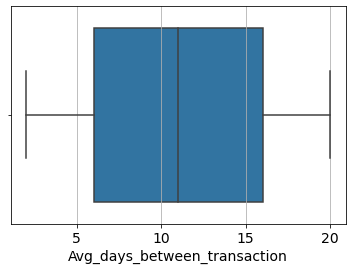

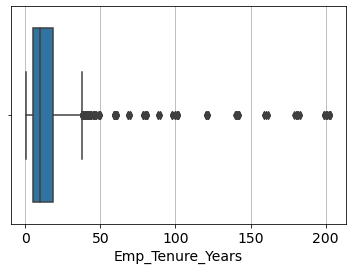

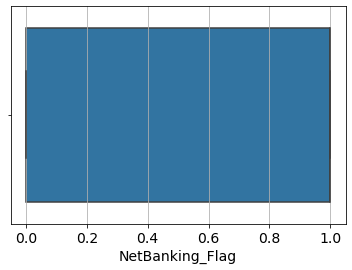

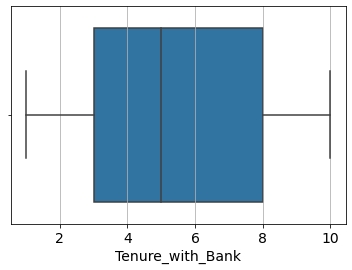

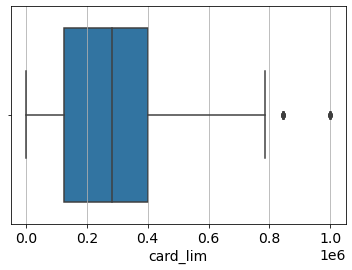

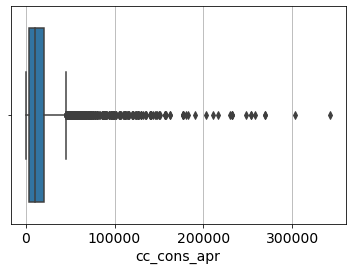

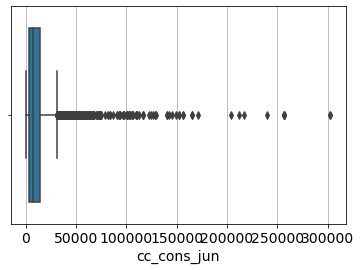

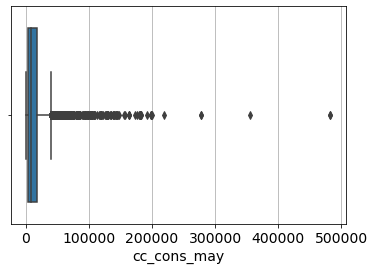

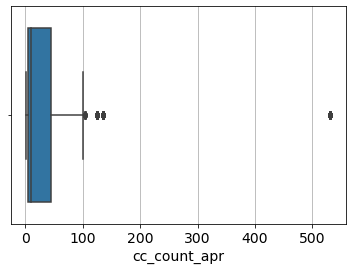

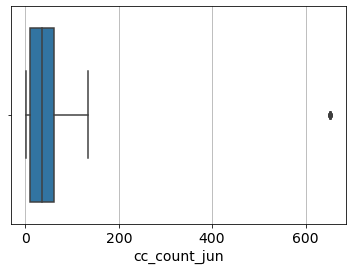

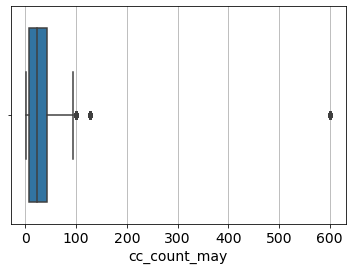

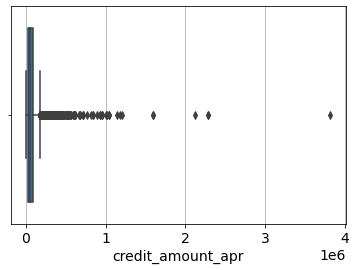

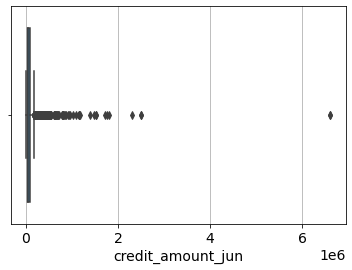

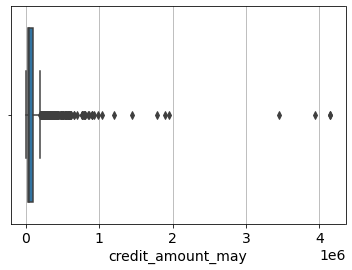

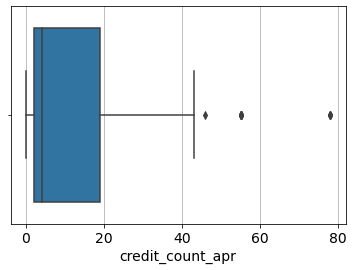

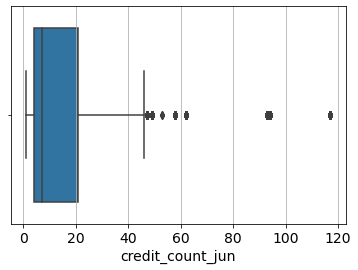

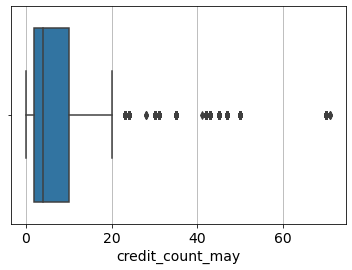

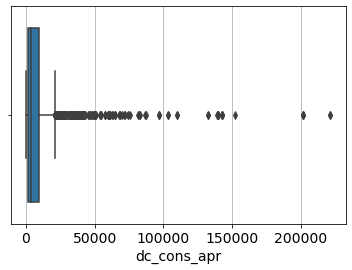

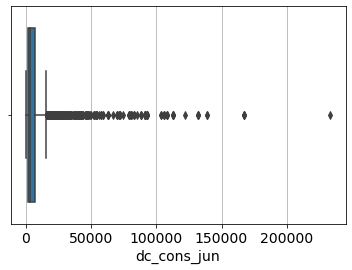

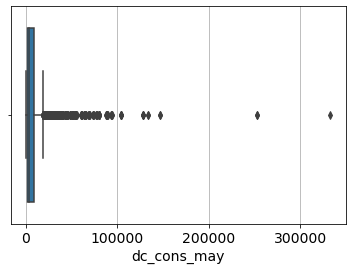

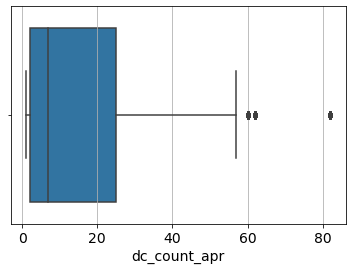

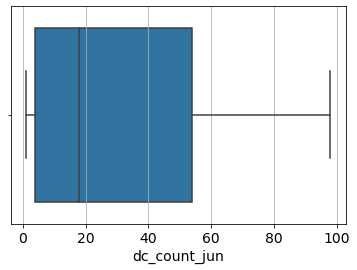

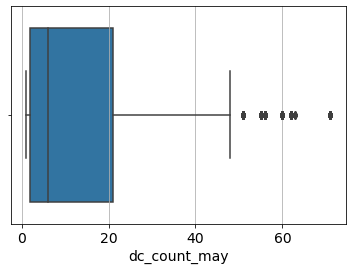

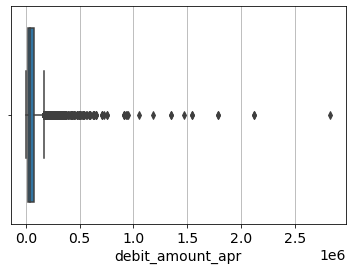

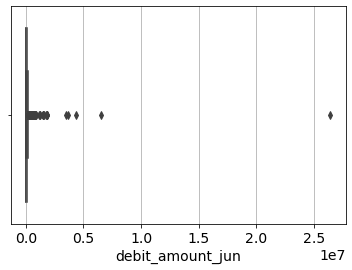

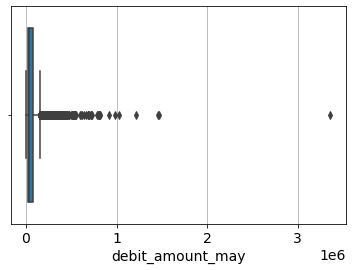

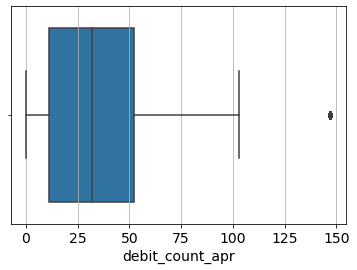

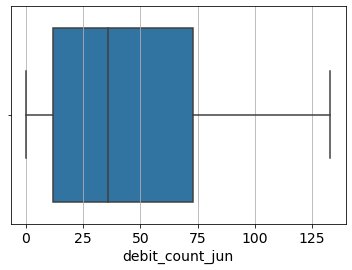

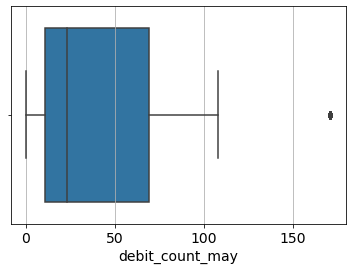

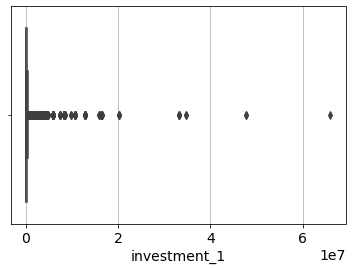

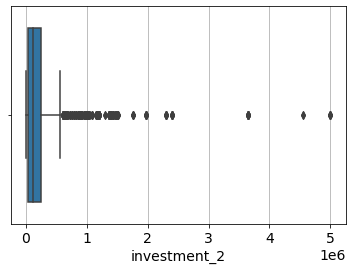

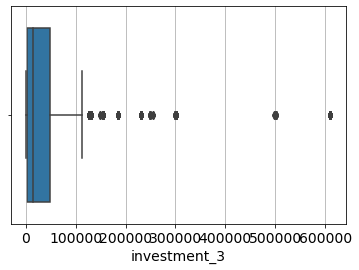

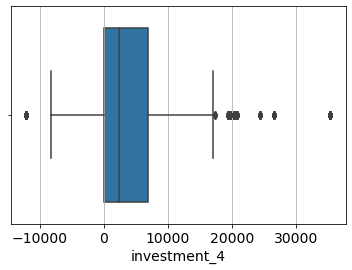

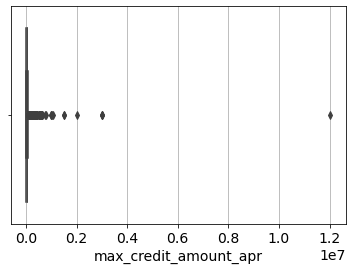

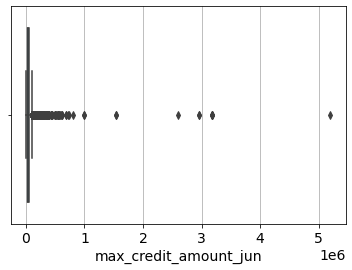

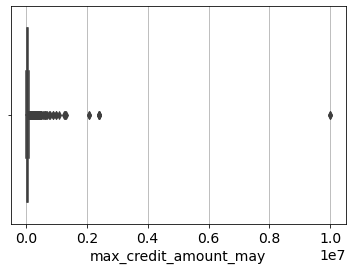

In [141]:
#Plotting outliers
for i in new_num.columns:
    sns.boxplot(new_num[i])
    plt.show()

In [150]:
#Treating outliers
def outlier_var(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x= x.clip(lower = x.quantile(0.1), upper = x.quantile(0.70))
    else:
        x
    return x
new_num=new_num.apply(outlier_var)

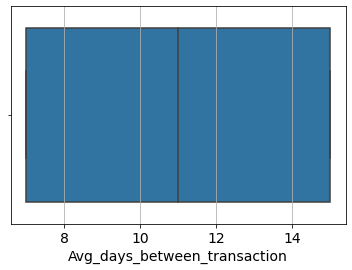

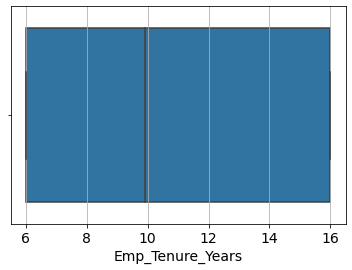

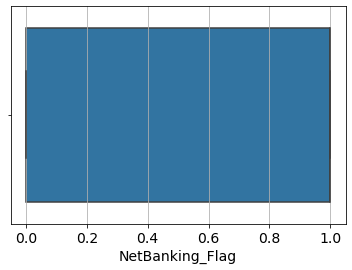

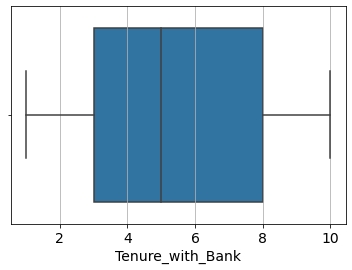

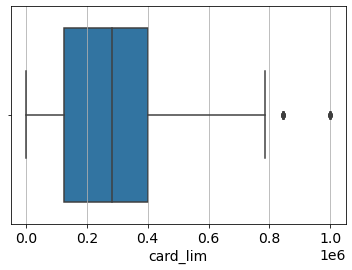

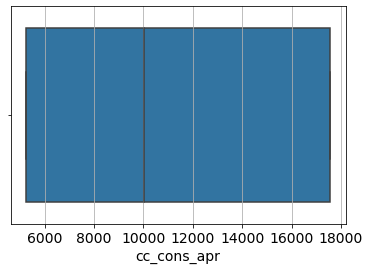

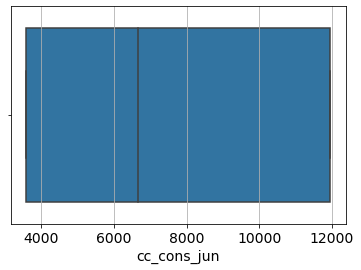

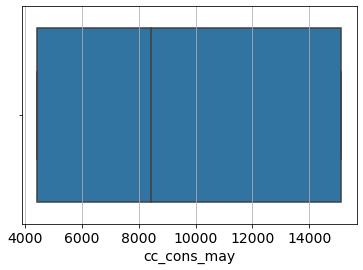

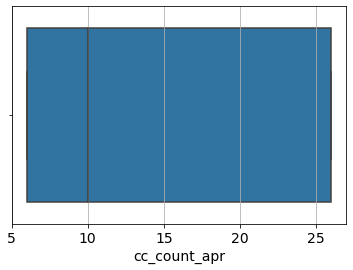

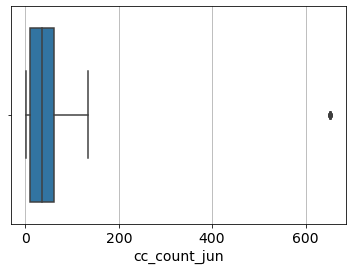

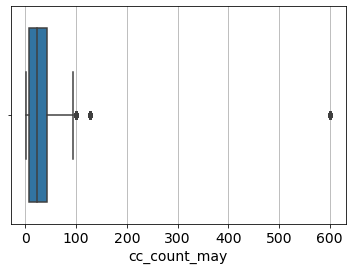

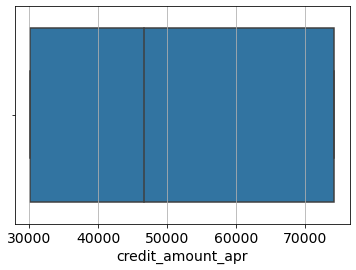

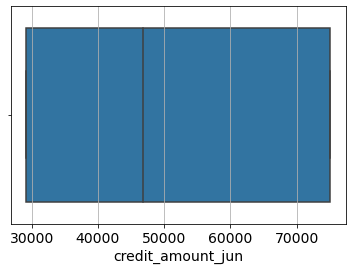

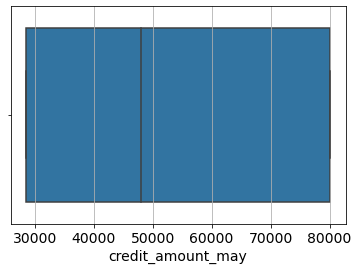

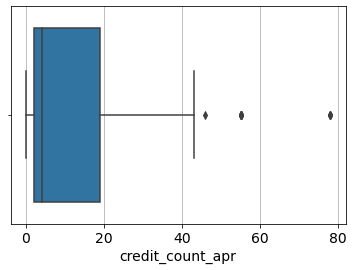

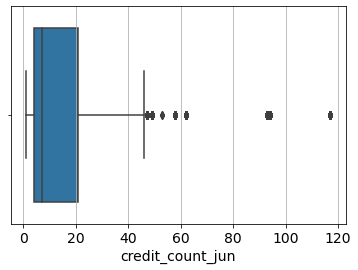

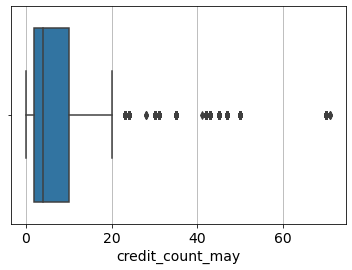

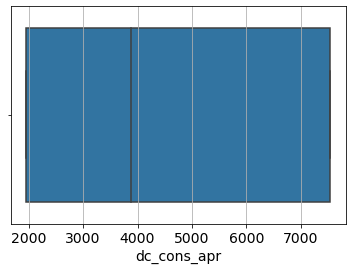

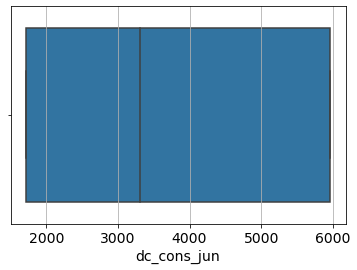

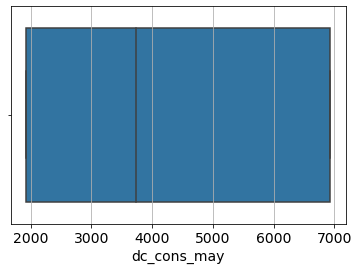

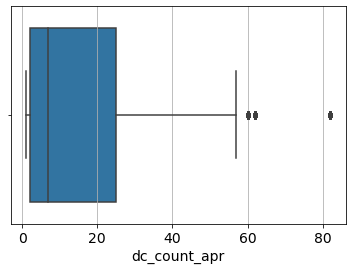

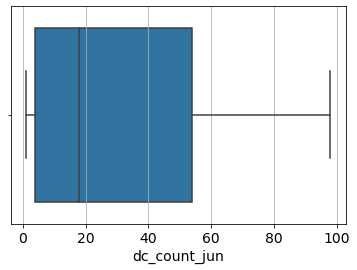

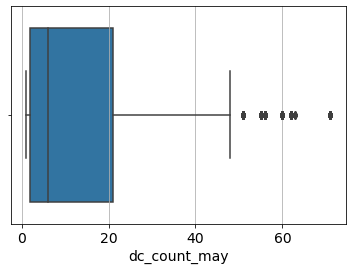

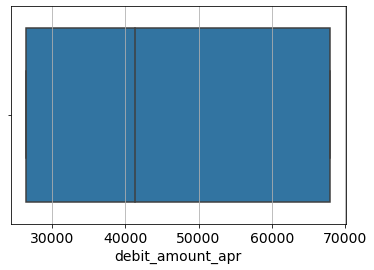

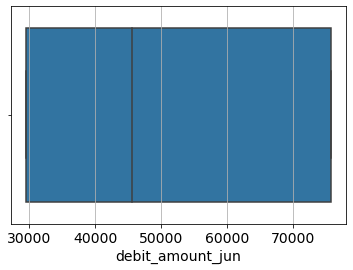

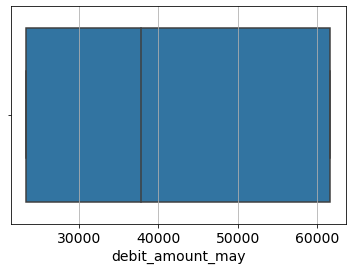

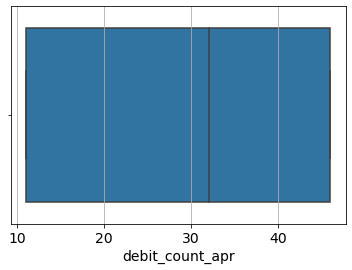

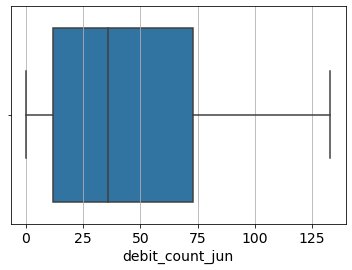

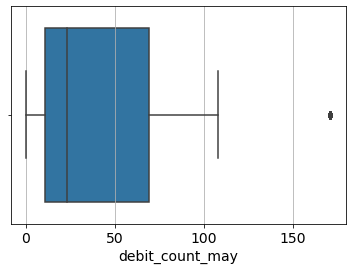

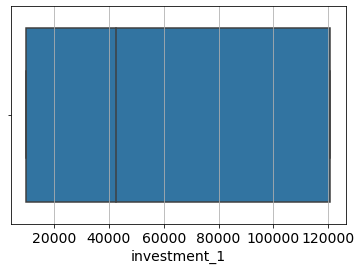

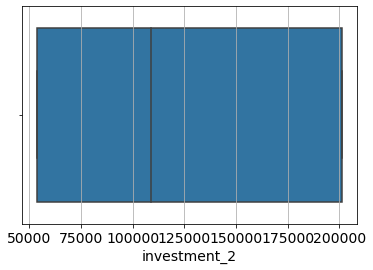

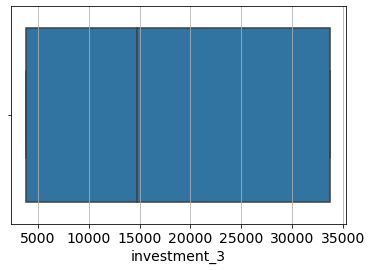

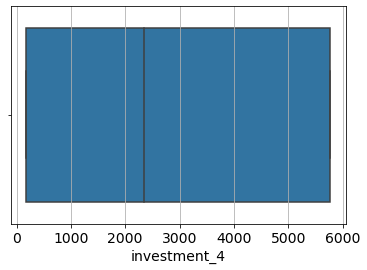

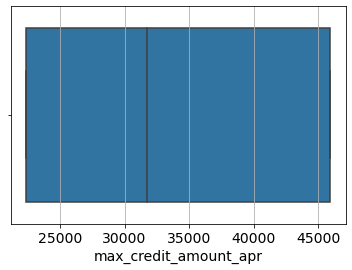

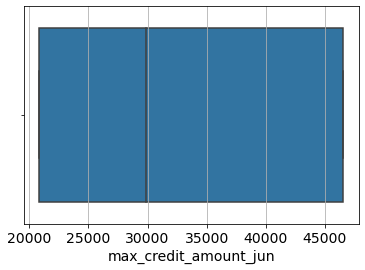

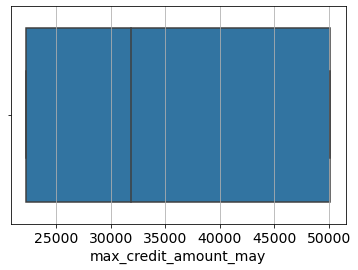

In [151]:
#Checking for outliers after treatment
for i in new_num.columns:
    sns.boxplot(new_num[i])
    plt.show()

In [152]:
#Dummy creation for nominal categorical variables
new_X= pd.get_dummies(new_X, columns = ['account_type', 'loan_enq',"gender"], drop_first=True)

In [154]:
#Label encoding for ordinal categorical variables
new_X["Income"]=encoder.fit_transform(new_X["Income"])

In [157]:
pt= PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = pt.fit_transform(new_X)

In [161]:
trans_X=pd.DataFrame(data_trans,index=new_X.index,columns=new_X.columns)
trans_X.head()

,Avg_days_between_transaction,Emp_Tenure_Years,ID,Income,NetBanking_Flag,Tenure_with_Bank,age,card_lim,cc_cons_apr,cc_cons_jun,...,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,personal_loan_active,personal_loan_closed,region_code,vehicle_loan_active,vehicle_loan_closed,account_type_saving,gender_M
15000,0.911639,0.236105,1.229686,0.751751,0.633828,-0.437285,-0.271354,-0.755945,-1.027820,0.294626,...,-0.337049,-0.175237,-1.046639,-8.881784e-16,-8.881784e-16,-0.103243,-8.881784e-16,-8.881784e-16,-0.43676,0.388945
15001,1.395672,-0.216826,0.662437,0.751751,-1.577715,0.253356,-0.732577,-1.321529,0.989015,0.451496,...,-2.031342,-0.755351,-0.621291,-8.881784e-16,-8.881784e-16,-0.932880,-8.881784e-16,-8.881784e-16,-0.43676,0.388945
15002,0.745778,1.306370,0.646362,-1.148547,0.633828,1.479405,0.813997,-1.418733,-0.401118,-1.783191,...,-0.804655,-0.698837,0.031562,-8.881784e-16,-8.881784e-16,-1.259876,-8.881784e-16,-8.881784e-16,-0.43676,0.388945
15003,-0.696559,-0.216826,-0.092313,0.751751,0.633828,-0.083358,-0.732577,1.188822,-1.254939,-0.356555,...,2.287535,0.773820,1.007920,-8.881784e-16,-8.881784e-16,-1.044536,-8.881784e-16,-8.881784e-16,-0.43676,0.388945
15004,-1.550496,0.297279,0.833323,-1.148547,0.633828,1.187537,1.153685,-0.567780,-0.900941,-0.550585,...,-0.832868,0.253279,-0.204051,-8.881784e-16,-8.881784e-16,-0.421757,-8.881784e-16,-8.881784e-16,-0.43676,0.388945


In [162]:
final_X=trans_X[['debit_count_apr',
                 'credit_count_may',
                 'debit_count_jun',
                 'dc_count_may',
                 'dc_count_apr',
                 'cc_count_apr',
                 'cc_count_may',
                 'investment_3',
                 'credit_count_apr',
                 'Income',
                 'Avg_days_between_transaction',
                 'dc_cons_apr',
                 'max_credit_amount_may']]

In [172]:
#Predicting Y using voting reressor model
y_pred=het_model.predict(final_X)

In [173]:
#Reverse transformation on predicted Y
np.exp(y_pred)

array([11048.85737134, 10474.93759391,  9498.94041958, ...,
        7645.57221127,  8351.73932478,  9696.83564567])

In [179]:
new_pred=pd.DataFrame(np.exp(y_pred),columns=['cc_cons'],index=new.index)
new_pred['ID']=new.ID
new_pred

,cc_cons,ID
15000,11048.857371,17591
15001,10474.937594,13541
15002,9498.940420,13431
15003,7543.657966,8687
15004,8577.793349,14727
...,...,...
19995,10374.683334,12512
19996,10160.939522,14224
19997,7645.572211,18740
19998,8351.739325,18134


## Model Deployment

In [180]:
import pickle

In [181]:
pikle=open('regressor.pkl','wb')
pickle.dump(het_model,pikle)
pikle.close()